In [4]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from bm3d import bm3d
from skimage.metrics import peak_signal_noise_ratio as psnr

In [5]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [12]:
def bm3d_denoise_color(image_noised, sigma_psd):
    if image_noised.ndim == 2:
        image_filtree = bm3d(image_noised, sigma_psd)
    elif image_noised.ndim == 3 and image_noised.shape[2] == 3:
        # Appliquer BM3D canal par canal
        image_filtree = np.zeros_like(image_noised)
        for channel in range(3):
            image_filtree[:, :, channel] = bm3d(image_noised[:, :, channel], sigma_psd)
    else:
        raise ValueError("Format d'image non supporté (doit être en niveaux de gris ou RGB).")
    return image_filtree

def test_bm3d_on_image(image_path, noise_variance=0.01, sigma_psd_values=[0.05, 0.1, 0.5, 1, 2, 3]):
    image = import_image(image_path) / 255
    if image.ndim == 2:  # Cas d'une image en niveaux de gris
        display_image(image, "Image originale")
    else:
        display_image(image, "Image originale")

    # Ajouter du bruit gaussien
    image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
    image_noised = np.clip(image_noised, 0, 1)
    display_image(image_noised, "Image avec bruit gaussien")

    # Calculer le PSNR de l'image bruitée
    psnr_noised = psnr(image, image_noised)
    print(f"PSNR entre l'image originale et l'image bruitée : {psnr_noised:.2f}")

    # Liste pour stocker les PSNR après débruitage
    psnr_values = []

    # Appliquer le filtre BM3D pour chaque valeur de sigma_psd
    for sigma_psd in sigma_psd_values:
        print(f"\nTesting BM3D avec sigma_psd = {sigma_psd}")
        image_denoised = bm3d_denoise_color(image_noised, sigma_psd)
        display_image(image_denoised, f"Image débruitée (sigma_psd={sigma_psd})")

        # Calculer le PSNR après débruitage
        psnr_val = psnr(image, image_denoised)
        psnr_values.append(psnr_val)
        print(f"PSNR après débruitage avec sigma_psd={sigma_psd} : {psnr_val:.2f}")

    # Tracer la courbe PSNR vs sigma_psd
    plt.figure(figsize=(8, 5))
    plt.plot(sigma_psd_values, psnr_values, marker='o', linestyle='-', color='b')
    plt.xlabel("Valeurs de sigma_psd")
    plt.ylabel("PSNR")
    plt.title("Variation du PSNR en fonction de sigma_psd pour BM3D")
    plt.grid()
    plt.show()

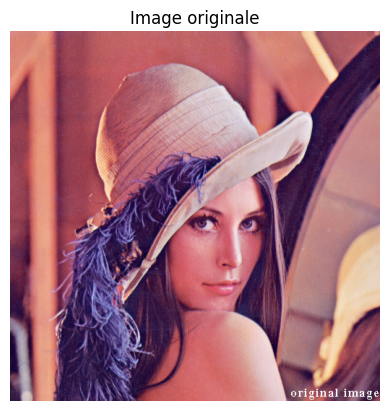

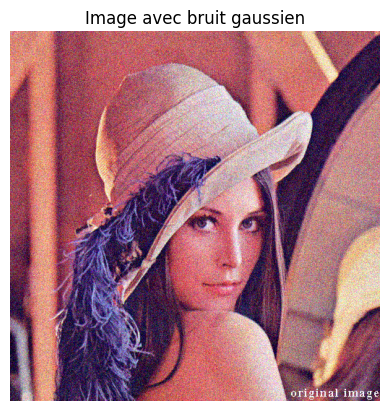

PSNR entre l'image originale et l'image bruitée : 20.20

Testing BM3D avec sigma_psd = 0.05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020523257553577423..1.0268235206604004].


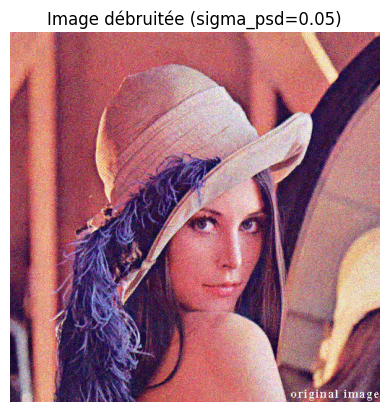

PSNR après débruitage avec sigma_psd=0.05 : 22.25

Testing BM3D avec sigma_psd = 0.1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028065931051969528..1.0599042177200317].


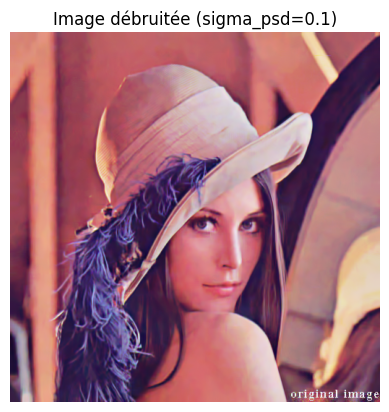

PSNR après débruitage avec sigma_psd=0.1 : 30.46

Testing BM3D avec sigma_psd = 0.5


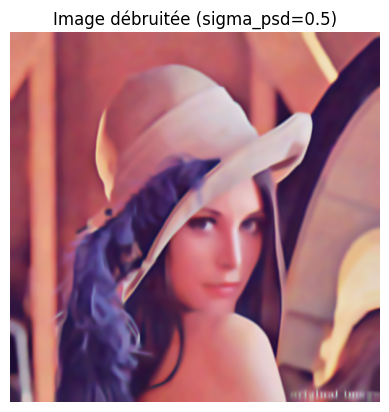

PSNR après débruitage avec sigma_psd=0.5 : 26.04

Testing BM3D avec sigma_psd = 1


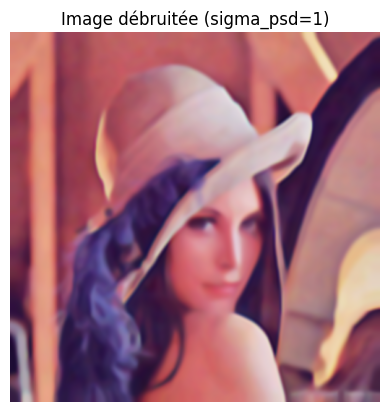

PSNR après débruitage avec sigma_psd=1 : 24.65

Testing BM3D avec sigma_psd = 2


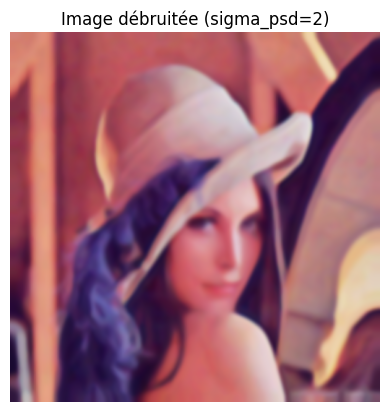

PSNR après débruitage avec sigma_psd=2 : 23.52

Testing BM3D avec sigma_psd = 3


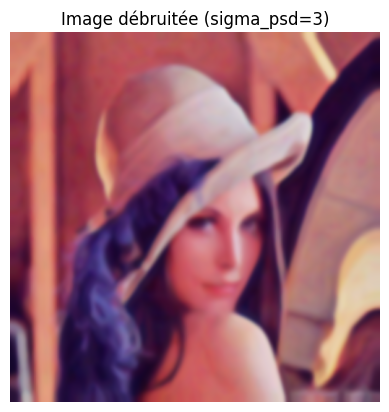

PSNR après débruitage avec sigma_psd=3 : 22.16


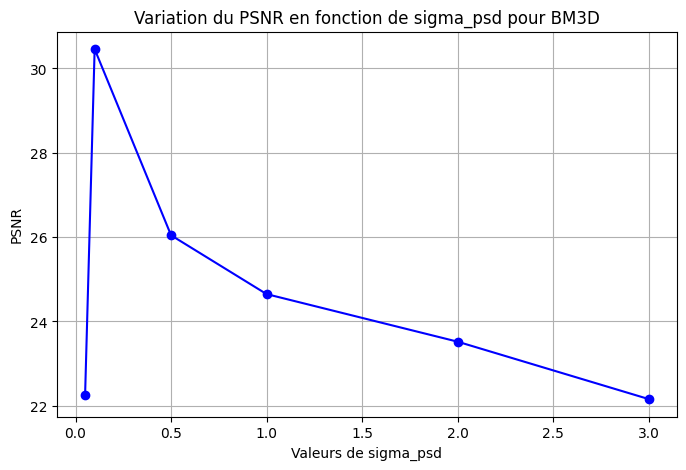

In [13]:
test_bm3d_on_image("lena.ppm", noise_variance=0.01)